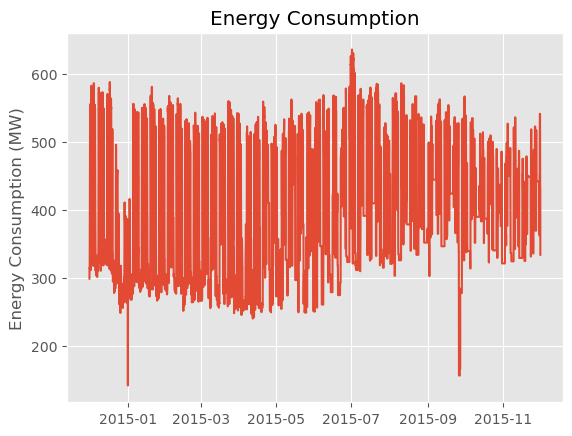

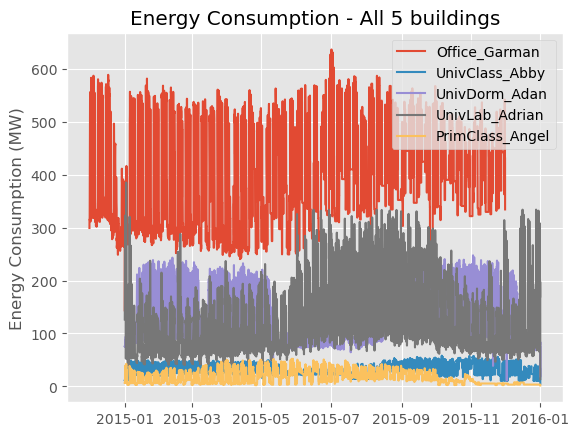

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set Plotting Styles
plt.style.use('ggplot')


# Read the data from CSV files

# Office_Garman
og_df = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
og_df = og_df.drop_duplicates()
# Set the frequency to hourly
og_df = og_df.asfreq('H')
# Fill missing values using forward fill method
og_df = og_df.fillna(method='ffill')

# UnivClass_Abby
uc_df = pd.read_csv("UnivClass_Abby.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
uc_df = uc_df.drop_duplicates()
# Set the frequency to hourly
uc_df = uc_df.asfreq('H')
# Fill missing values using forward fill method
uc_df = uc_df.fillna(method='ffill')

# UnivDorm_Adan
ud_df = pd.read_csv("UnivDorm_Adan.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
ud_df = ud_df.drop_duplicates()
# Set the frequency to hourly
ud_df = ud_df.asfreq('H')
# Fill missing values using forward fill method
ud_df = ud_df.fillna(method='ffill')

# UnivLab_Adrian
uv_df = pd.read_csv("UnivLab_Adrian.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
uv_df = uv_df.drop_duplicates()
# Set the frequency to hourly
uv_df = uv_df.asfreq('H')
# Fill missing values using forward fill method
uv_df = uv_df.fillna(method='ffill')

# PrimClass_Angel
pc_df = pd.read_csv("PrimClass_Angel.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
pc_df = pc_df.drop_duplicates()
# Set the frequency to hourly
pc_df = pc_df.asfreq('H')
# Fill missing values using forward fill method
pc_df = pc_df.fillna(method='ffill')

# Visualizing Energy Consumption Data - Office_Garman
plt.plot(og_df.index, og_df['Office_Garman'])
plt.title('Energy Consumption')
plt.ylabel('Energy Consumption (MW)')
plt.show()

# Visualizing Energy Consumption Data - all 5 buildings
plt.plot(og_df.index, og_df['Office_Garman'], label='Office_Garman')
plt.plot(uc_df.index, uc_df['UnivClass_Abby'], label='UnivClass_Abby')
plt.plot(ud_df.index, ud_df['UnivDorm_Adan'], label='UnivDorm_Adan')
plt.plot(uv_df.index, uv_df['UnivLab_Adrian'], label='UnivLab_Adrian')
plt.plot(pc_df.index, pc_df['PrimClass_Angel'], label='PrimClass_Angel')

plt.title('Energy Consumption - All 5 buildings')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

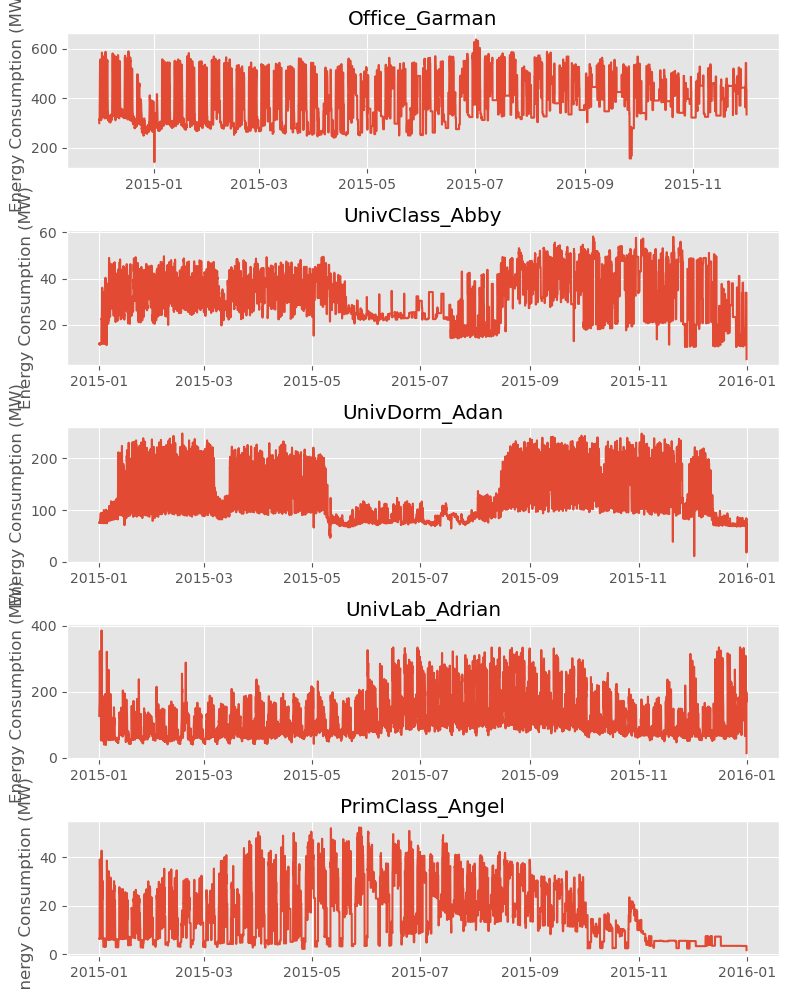

In [6]:
# Create a grid of subplots with one column
fig, axs = plt.subplots(5, 1, figsize=(8, 10))

# Plotting the datasets in subplots
axs[0].plot(og_df.index, og_df['Office_Garman'])
axs[0].set_title('Office_Garman')
axs[0].set_ylabel('Energy Consumption (MW)')

axs[1].plot(uc_df.index, uc_df['UnivClass_Abby'])
axs[1].set_title('UnivClass_Abby')
axs[1].set_ylabel('Energy Consumption (MW)')

axs[2].plot(ud_df.index, ud_df['UnivDorm_Adan'])
axs[2].set_title('UnivDorm_Adan')
axs[2].set_ylabel('Energy Consumption (MW)')

axs[3].plot(uv_df.index, uv_df['UnivLab_Adrian'])
axs[3].set_title('UnivLab_Adrian')
axs[3].set_ylabel('Energy Consumption (MW)')

axs[4].plot(pc_df.index, pc_df['PrimClass_Angel'])
axs[4].set_title('PrimClass_Angel')
axs[4].set_ylabel('Energy Consumption (MW)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [7]:
WEEK_END_INDEX = 7*24
plt.plot(newData.index[:WEEK_END_INDEX], newData['Office_Garman'][:WEEK_END_INDEX])
plt.title('Energy Consumption (One Week)')
plt.ylabel('Energy Consumption (MW)')
plt.show()

NameError: name 'newData' is not defined

/var/folders/p5/4n4tz9b556x0wctr33bl1jkh0000gp/T/ipykernel_8357/2887371973.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df['Date'].dt.weekofyear


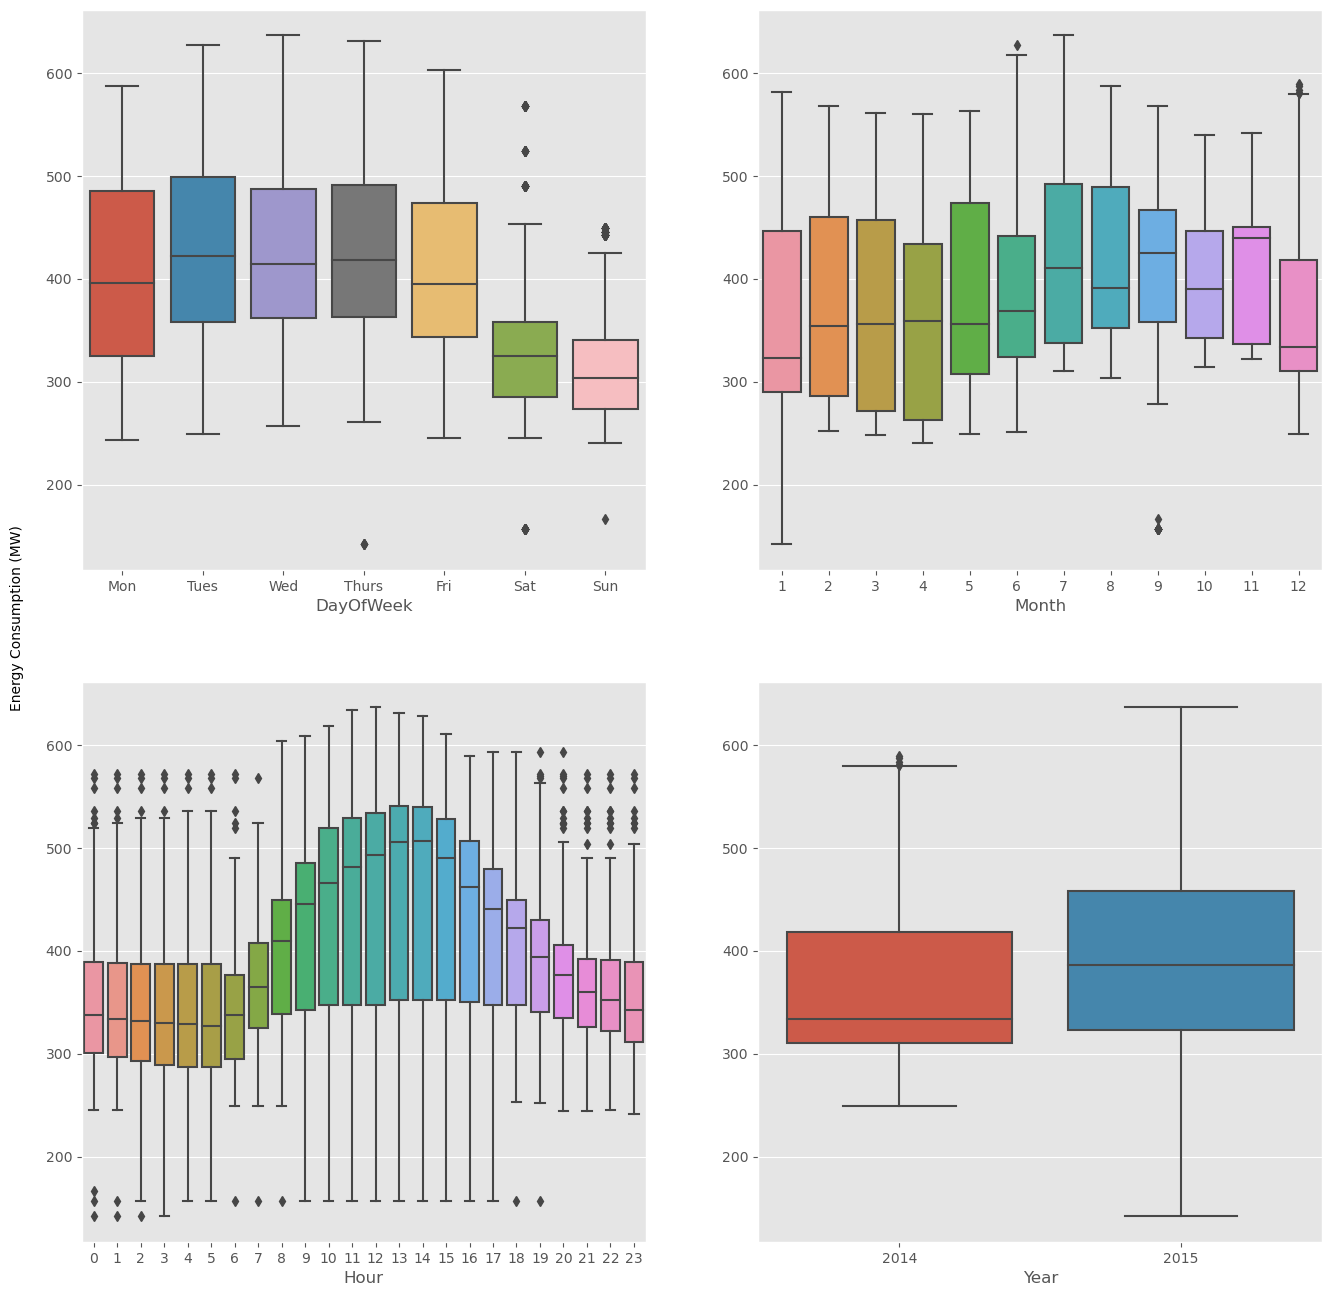

In [7]:
# Breking down DatetimeIndex into separate features 
# so we can look at some of these patterns a little more closely

def create_features(df):
    df['Date'] = df.index
    df['Hour'] = df['Date'].dt.hour
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Quarter'] = df['Date'].dt.quarter
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['DayOfMonth'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.weekofyear
    df['DayOfYearFloat'] = df['DayOfYear'] + df['Hour'] / 24
    df.drop('Date', axis=1, inplace=True)
    return df
newData = create_features(newData)
fig, axes = plt.subplots(2, 2, figsize=(16,16))
# Day of Week
dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
g = sns.boxplot(x=newData.DayOfWeek, y=newData.Office_Garman, ax=axes[0][0])
g.set_xticklabels(dow_labels)
g.set_ylabel('')
# Month of Year
g = sns.boxplot(x=newData.Month, y=newData.Office_Garman, ax=axes[0][1])
g.set_ylabel('')
# Hour of Day
g = sns.boxplot(x=newData.Hour, y=newData.Office_Garman, ax=axes[1][0])
g.set_ylabel('')
# Year
g = sns.boxplot(x=newData.Year, y=newData.Office_Garman, ax=axes[1][1])
g.set_ylabel('')
fig.text(0.08, 0.5, 'Energy Consumption (MW)', va='center', rotation='vertical')
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(newData['Office_Garman'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -11.660973171965004
p-value: 1.9338052604326435e-21


The p-value is less than 0.05, hence the null hypothesis of ADF test is rejected. The ts does not have a unit root, hence it is stationary. 

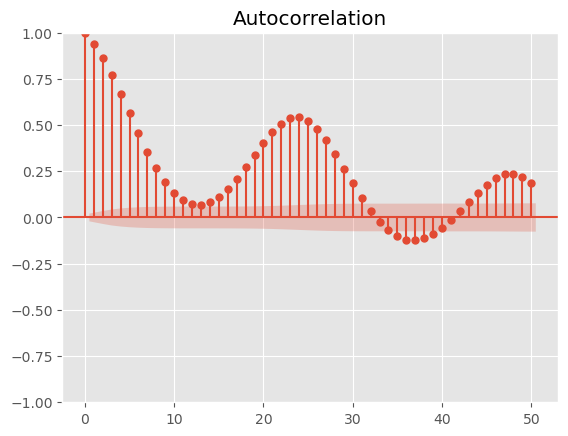

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(newData['Office_Garman'], lags=50)
plt.show()

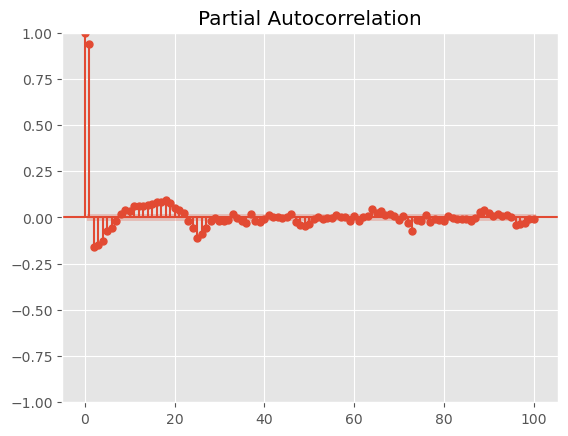

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(newData['Office_Garman'], lags=100)
plt.show()

### one-step forecasting approach using a simple AR(1) model
Forecasts will be generated using a one-step approach. This approach forecasts the value for the next time step in the series. The forecasted value is stored in a list. Once an actual value has been observed for the next time step, this value is incorporated into the time series. The model is then retrained and used to predict the value for the next unobserved time step. This process is repeated over a user-identified window of time.

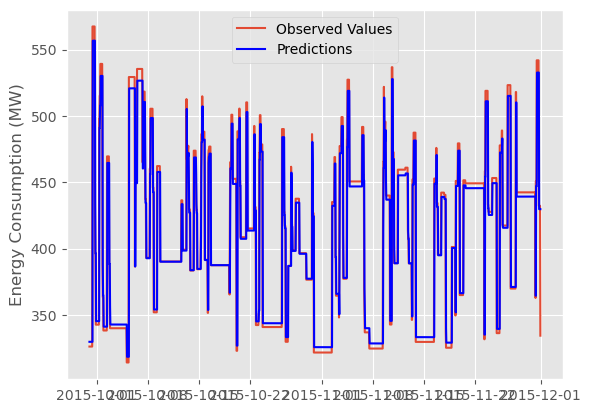

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

train_series = newData.loc[(newData.index >= datetime(2014, 12, 1)) & (newData.index < datetime(2015, 9, 30)), 'Office_Garman']
test_series = newData.loc[(newData.index >= datetime(2015, 9, 30)), 'Office_Garman']

preds = []
history = [x for x in train_series]

for t in range(len(test_series)):
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)  # Specify steps=1 to forecast a single value
    preds.append(output[0])  # Use output[0] directly without indexing
    history.append(test_series[t])

pred_series = pd.Series(preds, index=test_series.index)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_series, label='Observed Values')
plt.plot(pred_series, color='blue', label='Predictions')
plt.title('ARIMA (1,0,0)')
plt.legend()
plt.ylabel('Energy Consumption (MW)')
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test_series, pred_series)

# Calculate MAPE
mape = mean_absolute_percentage_error(test_series, pred_series)

# Calculate RMSE
rmse = mean_squared_error(test_series, pred_series, squared=False)

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)


MAE: 9.543891660521362
MAPE: 0.022529734499112674
RMSE: 25.47011042276653


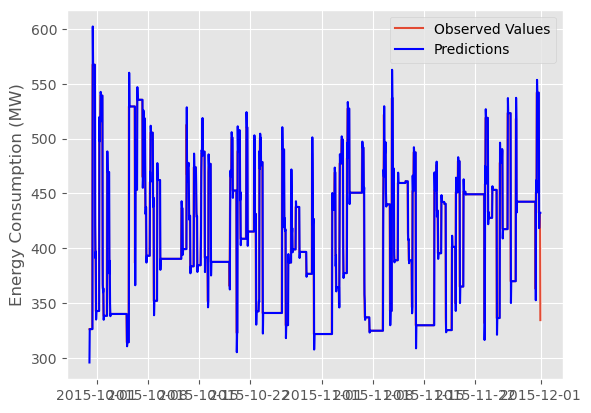

MAE: 7.715295923789443
MAPE: 0.018067079901175655
RMSE: 26.21625411588707


In [36]:
train_series = newData.loc[(newData.index >= datetime(2014, 12, 1)) & (newData.index < datetime(2015, 9, 30)), 'Office_Garman']
test_series = newData.loc[(newData.index >= datetime(2015, 9, 30)), 'Office_Garman']

preds = []
history = [x for x in train_series]

for t in range(len(test_series)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)  # Specify steps=1 to forecast a single value
    preds.append(output[0])  # Use output[0] directly without indexing
    history.append(test_series[t])

pred_series = pd.Series(preds, index=test_series.index)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_series, label='Observed Values')
plt.plot(pred_series, color='blue', label='Predictions')
plt.title('ARIMA (1,1,0)')
plt.legend()
plt.ylabel('Energy Consumption (MW)')
plt.show()

# Calculate MAE
mae = mean_absolute_error(test_series, pred_series)

# Calculate MAPE
mape = mean_absolute_percentage_error(test_series, pred_series)

# Calculate RMSE
rmse = mean_squared_error(test_series, pred_series, squared=False)

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

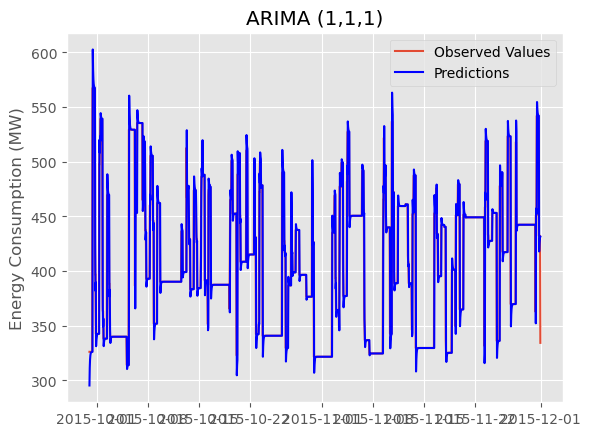

MAE: 8.300431417343948
MAPE: 0.019469730231467402
RMSE: 26.328268284626997


In [37]:
train_series = newData.loc[(newData.index >= datetime(2014, 12, 1)) & (newData.index < datetime(2015, 9, 30)), 'Office_Garman']
test_series = newData.loc[(newData.index >= datetime(2015, 9, 30)), 'Office_Garman']

preds = []
history = [x for x in train_series]

for t in range(len(test_series)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)  # Specify steps=1 to forecast a single value
    preds.append(output[0])  # Use output[0] directly without indexing
    history.append(test_series[t])

pred_series = pd.Series(preds, index=test_series.index)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_series, label='Observed Values')
plt.plot(pred_series, color='blue', label='Predictions')
plt.title('ARIMA (1,1,1)')
plt.legend()
plt.ylabel('Energy Consumption (MW)')
plt.show()

# Calculate MAE
mae = mean_absolute_error(test_series, pred_series)

# Calculate MAPE
mape = mean_absolute_percentage_error(test_series, pred_series)

# Calculate RMSE
rmse = mean_squared_error(test_series, pred_series, squared=False)

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

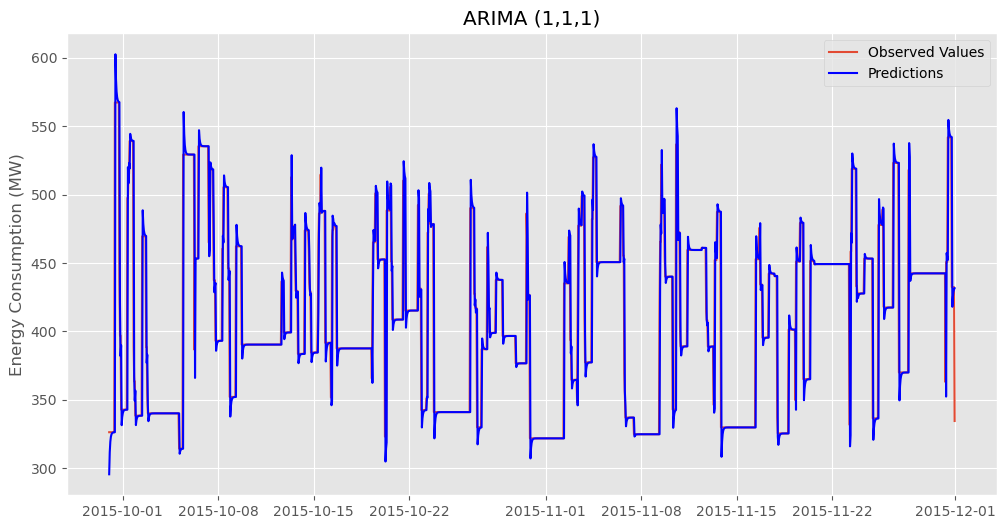

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_series, label='Observed Values')
plt.plot(pred_series, color='blue', label='Predictions')
plt.title('ARIMA (1,1,1)')
plt.legend()
plt.ylabel('Energy Consumption (MW)')
plt.show()

### using grid search to find p,d,q

In [47]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of values to try for p, d, and q
p_range = range(0, 3)  # Autoregressive order
d_range = range(0, 1)  # Differencing order
q_range = range(0, 3)  # Moving average order
s = 24  # Seasonality (24 hours)

# Generate all possible combinations of p, d, and q
orders = list(itertools.product(p_range, d_range, q_range))

best_aic = float('inf')  # Initialize the best AIC as infinity
best_order = None

# Perform grid search
for order in orders:
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()
    aic = model_fit.aic
    if aic < best_aic:
        best_aic = aic
        best_order = order

# Fit the model with the best order
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

# Forecast using the best model
forecast = best_model_fit.forecast(steps=len(test_series))

# Calculate evaluation metrics
mae = mean_absolute_error(test_series, forecast)
mape = mean_absolute_percentage_error(test_series, forecast)
rmse = mean_squared_error(test_series, forecast, squared=False)

print("Best Order:", best_order)
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)


/Users/Ubaid/Library/CloudStorage/OneDrive-UniversidadedoAlgarve/analysis-dir/ts-data/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Ubaid/Library/CloudStorage/OneDrive-UniversidadedoAlgarve/analysis-dir/ts-data/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best Order: (2, 0, 2)
MAE: 53.37306009229757
MAPE: 0.12674424707082052
RMSE: 65.63837042264888


## need to try SARIMA model with a seasonality of 24 and a value of 1 for all available parameters related to autoregression, moving average, and differencing.